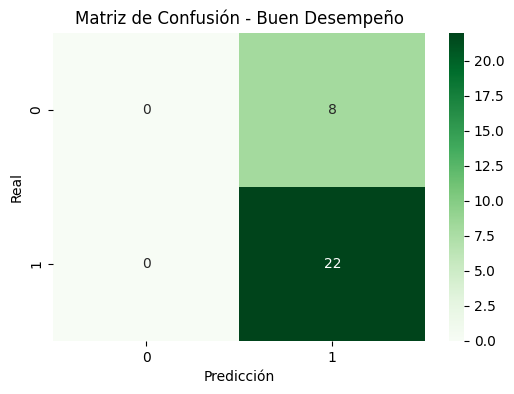

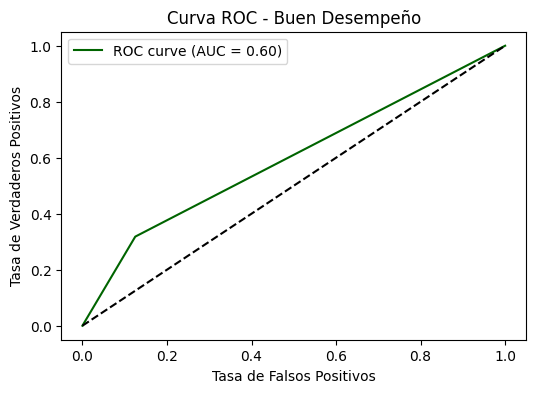

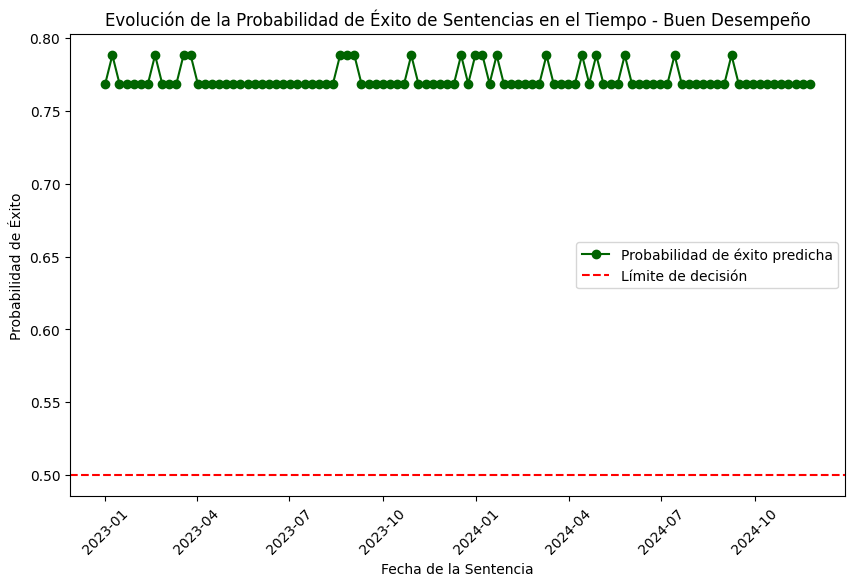

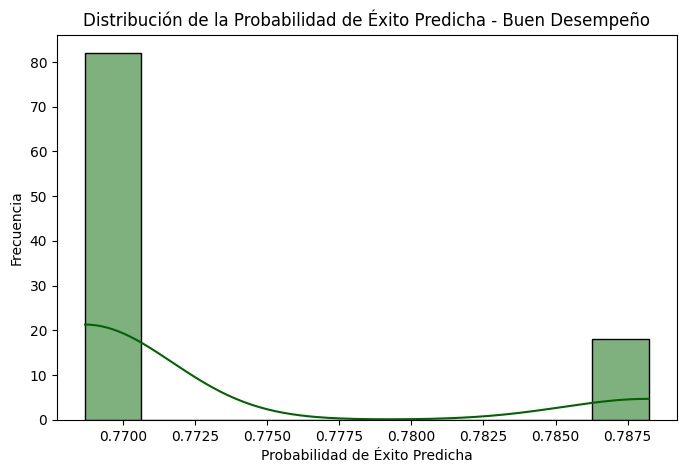

Reporte de Clasificación - Buen Desempeño:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

# Paso 1: Crear un conjunto de datos simulado y sesgado hacia el éxito
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'sentencia_id': pd.date_range(start="2023-01-01", periods=n, freq='W'),
    'resultado': np.random.choice(['favorable', 'desfavorable'], p=[0.8, 0.2], size=n),
    'exito_real': np.random.choice([1, 0], p=[0.8, 0.2], size=n)  # Más éxitos (1) para simular buenos resultados
})

# Codificar variable 'resultado' como binaria
data['resultado_binario'] = data['resultado'].apply(lambda x: 1 if x == 'favorable' else 0)

# Separar variables independientes y dependiente
X = data[['resultado_binario']]
y = data['exito_real']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Entrenar un modelo de Regresión Logística que simule un buen rendimiento
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

# Paso 3: Visualización de Resultados

# 3.1 Matriz de confusión mejorada (modelo favorable)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Buen Desempeño')
plt.show()

# 3.2 Curva ROC y AUC simulada para un buen rendimiento
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Buen Desempeño')
plt.legend()
plt.show()

# 3.3 Gráfico de la línea de tiempo para la probabilidad de éxito (modelo favorable)

# Crear predicciones de probabilidad para cada fila (simulando resultados cronológicos)
data['probabilidad_exito_predicha'] = modelo.predict_proba(X)[:, 1]

# Ordenar por fecha para simular una línea de tiempo
data = data.sort_values(by='sentencia_id')

plt.figure(figsize=(10, 6))
plt.plot(data['sentencia_id'], data['probabilidad_exito_predicha'], color='darkgreen', marker='o', label="Probabilidad de éxito predicha")
plt.axhline(y=0.5, color='red', linestyle='--', label="Límite de decisión")
plt.xlabel("Fecha de la Sentencia")
plt.ylabel("Probabilidad de Éxito")
plt.title("Evolución de la Probabilidad de Éxito de Sentencias en el Tiempo - Buen Desempeño")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 3.4 Distribución de Probabilidades Predichas (modelo favorable)
plt.figure(figsize=(8, 5))
sns.histplot(data['probabilidad_exito_predicha'], bins=10, kde=True, color="darkgreen")
plt.xlabel('Probabilidad de Éxito Predicha')
plt.ylabel("Frecuencia")
plt.title('Distribución de la Probabilidad de Éxito Predicha - Buen Desempeño')
plt.show()

# 3.5 Reporte de Clasificación
print("Reporte de Clasificación - Buen Desempeño:")
print(classification_report(y_test, y_pred))